# Elliot Porter - HW3
October 13, 2025

In [1]:
#import necessary packages
using Pkg
using LinearAlgebra
using Plots
using Statistics
using SparseArrays
using PrettyTables
using JSON
using Colors
using Random


### **P2.50 — Some Linear Functions Associated with a Convolution System**

Suppose that $u$ and $y$ are scalar-valued discrete-time signals (i.e., sequences) related via convolution:

$$
y(k) = \sum_j h_j u(k - j), \quad k \in \mathbb{Z},
$$

where $h_k \in \mathbb{R}$, and the convolution is *causal*, i.e., $h_j = 0$ when $j < 0$.

---

#### (a) The input/output (Toeplitz) matrix

Assume $u(k) = 0$ for $k < 0$, and define

$$
U =
\begin{bmatrix}
u(0) \\ u(1) \\ \vdots \\ u(N)
\end{bmatrix},
\quad
Y =
\begin{bmatrix}
y(0) \\ y(1) \\ \vdots \\ y(N)
\end{bmatrix}.
$$

Thus $U$ and $Y$ are vectors that give the first $N+1$ values of the input and output signals, respectively.  
Find the matrix $T$ such that $Y = T U$.  
$T$ is called the **input/output** or **Toeplitz** matrix (of size $N+1$) associated with the convolution system.

---

#### (b) The Hankel matrix

Now assume $u(k) = 0$ for $k > 0$ or $k < -N$, and define

$$
U =
\begin{bmatrix}
u(0) \\ u(-1) \\ \vdots \\ u(-N)
\end{bmatrix},
\quad
Y =
\begin{bmatrix}
y(0) \\ y(1) \\ \vdots \\ y(N)
\end{bmatrix}.
$$

Here $U$ gives the past input to the system, and $Y$ gives (a chunk of) the resulting future output.  
Find the matrix $H$ such that $Y = H U$.  
$H$ is called the **Hankel** matrix (of size $N+1$) associated with the convolution system.


### **P2.50 Analysis**
---
#### **Part A**
So we have the equation: $$
y(k) = \sum_j h_j u_{k - j}, \quad k \in \mathbb{Z},
$$
where $h_k \in \mathbb{R}$, and the convolution is *causal*, i.e., $h_j = 0$ when $j < 0$.

We need to find a $T$ such that $Y = TU$ 

Okay lets write what the first $3, n$ terms of $y(k)$, where $y_i$ is the $i$-th index of $Y$:
For $len(Y) = 1$:
$$ y(0) = h_0 u(0)$$
$$ y(1) = h_1 u(0) + h_0 u(1)$$
$$ y(2) = h_2 u(0) + h_1 u(1) + h_0 u(2)$$
$$ y(3) = h_3 u(0) + h_2 u(1) + h_1 u(2) + h_0 u(3)$$
$$ y(n) = h_n u(0) + h_{n-1} u(1) + \text{...} + h_1 u(n-1) + h_0 u(n)$$

So we can see the pattern where $y_k$ is the weighted sum (from $h$) of the $k+1$ recent samples

Now we can say that the $T$ matrix is composed by these weights. Where:
$$T \in \mathbb{R}^{(N+1) \times (N+1)}$$
$$T = \begin{bmatrix}
h_0  & 0 & 0 &\dots & 0\\ 
h_1 & h_0  & 0 & \dots & 0\\ 
h_2 & h_1 & h_0 &\dots & 0 \\ 
\vdots & \vdots & \vdots & \ddots & 0 \\
h_N & h_{N-1} & h_{N-2} & \dots & h_0
\end{bmatrix},
\quad
$$

One thing to notice here for $H_{ij}$ is the following:
$$
T_{ij} =
\begin{cases}
h_{(i-j)}, & \text{for }  i \geq j,\\
0, & \text{if } i < j,\\
\end{cases}
$$

In [2]:
#code for part a
function build_T_mtx(var::Vector{Float64})
    n = length(var)
    println("len vec: ", n)
    T = zeros(n, n)         
    for i in 1:n
        for j in 1:i
            T[i, j] = var[i - j+1] #adjust 0th index to 1st index
        end
    end
    return T
end


# okay because julia starts indexing at 1, h_0 is really in the 1st index of H, but it is still the 0th index
# h_tes
H = [0.1, 1.0, 2.0, 3.0]
t_test = build_T_mtx(H)
println("H_test: ", H)
println("T_test:\n")
display(t_test)

len vec: 4
H_test: [0.1, 1.0, 2.0, 3.0]
T_test:



4×4 Matrix{Float64}:
 0.1  0.0  0.0  0.0
 1.0  0.1  0.0  0.0
 2.0  1.0  0.1  0.0
 3.0  2.0  1.0  0.1

---
#### **Part B**
---
### Hankel Representation

We can write the input–output relationship as:
$$
Y = H U,
\qquad H \in \mathbb{R}^{(N+1)\times(N+1)}.
$$

We know, since $Y = y(i)$ for $i \in \mathbb{R}$
$$
y(k) = \sum_{j=0}^{N} h_j\,u(k-j),
\qquad \text{where } u(k-j) \text{ corresponds to } u(-m)\text{ for past inputs.}
$$

Expanding the first few terms:
$$
\begin{aligned}
y(0) &= h_0 u(0),\\[4pt]
y(1) &= h_1 u(0) + h_0 u(-1),\\[4pt]
y(2) &= h_2 u(0) + h_1 u(-1) + h_0 u(-2),\\[4pt]
\vdots\\[4pt]
y(n) &= h_n u(0) + h_{n-1} u(-1) + \dots + h_0 u(-n).
\end{aligned}
$$


For inputs $U = [u(0), u(-1), u(-2), u(-3), u(-4)]^T$, the outputs satisfy:

When n  = 0:
$$y(0) = h_0 u(0)$$
When n  = 1:
$$y(0) = h_0 u(0) + h_1 u(-1)$$
$$y(1) = h_1 u(0) + h_0 u(-1)$$
When n  = 2:
$$y(0) = h_0 u(0) + h_1 u(-1) + h_2 u(-2)$$
$$y(1) = h_1 u(0) + h_2 u(-1) + h_3 u(-2)$$
$$y(2) = h_2 u(0) + h_3 u(-1) + h_4 u(-2)$$
$$y(3) = h_3 u(0) + h_2 u(-1) + h_1 u(-2) + h_0 u(-3)$$
When n  = 3:
$$y(0) = h_0 u(0) + h_1 u(-1) + h_2 u(-2)+ h_3 u(-3)$$
$$y(1) = h_1 u(0) + h_2 u(-1) + h_3 u(-2)+ h_4 u(-3)$$
$$y(2) = h_2 u(0) + h_3 u(-1) + h_4 u(-2)+ h_5 u(-3)$$
$$y(3) = h_3 u(0) + h_4 u(-1) + h_5 u(-2) + h_6 u(-3)$$

But when n = 4
$$
\begin{aligned}
y(0) &= h_0 u(0) +  h_1 u(-1) + h_2 u(-2) +  h_3 u(-2) + h_4 u(-4)\\
y(1) &= h_1 u(0) + h_2 u(-1) +  h_3 u(-2) + h_4 u(-3) + h_5 u(-4)\\
y(2) &= h_2 u(0) + h_3 u(-1) +  h_4 u(-2) + h_5 u(-3) + h_6 u(-4)\\
y(3) &= h_3 u(0) + h_4 u(-1) +  h_5 u(-2) + h_6 u(-3) + h_7 u(-4)\\
y(4) &= h_4 u(0) + h_5 u(-1) +  h_6 u(-2) + h_7 u(-3) + h_8 u(-4).
\end{aligned}
$$
This can be written compactly as $Y = H U$, where

$$
H =
\begin{bmatrix}
h_0 & h_1 & h_2 & h_3 & h_4\\
h_1 & h_2 & h_3 & h_4 & h_5\\
h_2 & h_3 & h_4 & h_5 & h_6\\
h_3 & h_4 & h_5 & h_6 & h_7\\
h_4 & h_5 & h_6 & h_7 & h_8\\
\end{bmatrix}.
$$Each $y(k)$ is  built from all pairs of $(h_j, u(-m))$
such that $j + m = k$.  
$$
H_{ij} =
\begin{cases}
h_{(i+j)}, & \text{for }  i > 0 \geq j,\\
0, & \text{if } i < j,\\
\end{cases}
$$

In [3]:
#writing code for part b
function build_H_mtx(n::Int, h::Vector{Float64})
    H = zeros(n, n)
    for i in 1:n
        for j in 1:n
            H[i,j] = h[i+j-1] #adjusting for indexing
        end
    end
    return H
end 
# 4x4 -> 5x5 --> 2n - 1 = len(h_weights)
n = 4
N = n+1
h_test = float.(collect(1:(2*N-1)))
H_test = build_H_mtx(N, h_test)
println("h_weights: \n ", h_test)
println("H_ij: \n")
display(H_test)


h_weights: 
 [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
H_ij: 



5×5 Matrix{Float64}:
 1.0  2.0  3.0  4.0  5.0
 2.0  3.0  4.0  5.0  6.0
 3.0  4.0  5.0  6.0  7.0
 4.0  5.0  6.0  7.0  8.0
 5.0  6.0  7.0  8.0  9.0

### **P4.590 — Reflection Through a Hyperplane**

Find the matrix $R \in \mathbb{R}^{n \times n}$ such that reflection of $x$
through the hyperplane $\{ z \mid a^T z = 0 \}$ (with $a \neq 0$) is given by $R x$.

Verify that the matrix $R$ is **orthogonal**.

*(To reflect $x$ through the hyperplane means the following: find the point $z$ on the hyperplane closest to $x$.
Starting from $x$, go in the direction $z - x$ through the hyperplane to a point on the opposite side,
which has the same distance to $z$ as $x$ does.)*


### **P4.590 Analysis**
So we have a hyperplane $H$ such that:
$$ H \subseteq \mathbb{R}^n$$
$$ H = \{ z \in \mathbb{R}^{n}\mid a^Tz = 0\} $$
So H is the set of all vectors, $z_i$ orthogonal to a. Or in other words:
$$ \langle a, z \rangle = 0$$
Sweet, so now, we have a basis orthogonal to any arbitrary $a \in \mathbb{R}^n$
Now we want to denote how any arbitrary vector, $x \in \mathbb{R}^n$ such that:
$$ x_{\text{reflected}} = Rx$$ 
Where: 
    $$ R \in \mathbb{R}^{n \times n}$$

Using the previous homework's knowledge, we can decompose $x$ in terms of its orthogonal and tangent to the hyperplane. 
$$ x = z + \text{proj}_a(x)$$
$$ z=  x - \text{proj}_a(x)$$

Now we can say the reflection, $x_{\text{reflected}}$ about the hyperplane $z$:
$$ x_{\text{reflected}} = z   - \text{proj}_a(x)$$
Where
$$ \text{proj}_a(x) = \frac{aa^T}{a^Ta} x$$
Now substituting to make everything in terms of $x$:
$$ x_{\text{reflected}} = (x - \frac{aa^T}{a^Ta}x)  - \frac{aa^T}{a^Ta}x$$
$$ x_{\text{reflected}} = x(I - 2\frac{aa^T}{a^Ta})$$
$$ R = I - 2\frac{aa^T}{a^Ta}$$

This checks out shape and dimension wise as:
$$ R \in \mathbb{R}^{n\times n} $$
$$ aa^T \in \mathbb{R}^{n\times n} $$
$$ a^Ta \in \mathbb{R}$$


3.167.0

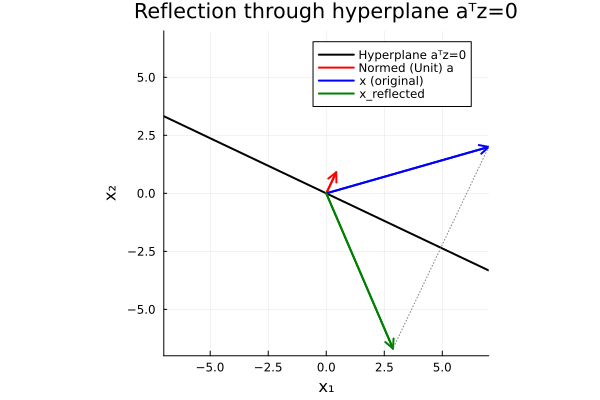

In [4]:
### now lets code up an example in R2
function get_R_mtx(a::AbstractVector{<:Real})
    n = length(a)
    Idt = Matrix{Float64}(I, n, n)
    R = Idt - 2 * (a * a') / (a' * a)    
    println("a is:")
    display(a)
    println("\nReflection matrix about a is:")
    display(R)
    return R
end

#R = get_R_mtx(a)

function get_reflections(a::AbstractVector{<:Real}, x::AbstractVector{<:Real})
    R = get_R_mtx(a)
    x_ref = R * x
    println("\n x: \n", x)
    println("\n x_ref: \n", x_ref)
    println("\n x - x_ref: \n", x - x_ref)
    return R, x_ref
end 

#R, x_ref = get_reflections(a, x)


function plot_reflection(a::AbstractVector{<:Real}, x::AbstractVector{<:Real})
    # Normalize a for clarity
    maxa = max(a[1], a[2])
    print(maxa)
    maxx = max(x[1], x[2])
    print(maxx)
    mx = max(maxa, maxx)
    â = a / norm(a)

    # Reflection matrix
    R = I - 2 * (â * â')
    x_ref = R * x

    # Hyperplane line (aᵀz = 0 → y = (-a₁/a₂)x)
    xs = range(-mx, mx, length=100)
    slope = -â[1] / â[2]
    ys = slope .* xs

    # Start plot
    plt = plot(xs, ys, color=:black, lw=2, label="Hyperplane aᵀz=0", aspect_ratio=:equal)
    plot!(plt, [0, â[1]], [0, â[2]], color=:red, lw=2, arrow=:arrow, label="Normed (Unit) a")

    # Plot x and reflected x
    plot!(plt, [0, x[1]], [0, x[2]], color=:blue, lw=2, arrow=:arrow, label="x (original)")
    plot!(plt, [0, x_ref[1]], [0, x_ref[2]], color=:green, lw=2, arrow=:arrow, label="x_reflected")

    # Optional symmetry line connecting x and x'
    plot!(plt, [x[1], x_ref[1]], [x[2], x_ref[2]], color=:gray, ls=:dot, label=false)
    xlims!(-mx, mx)
    ylims!(-mx, mx)
    title!("Reflection through hyperplane aᵀz=0")
    xlabel!("x₁")
    ylabel!("x₂")
    display(plt)
end


x = [7.0, 2.0]
a = [1.50, 3.160]
plot_reflection(a, x)


### **P4.600 — Sensor Integrity Monitor**

A suite of $m$ sensors yields measurement $y \in \mathbb{R}^m$ of some vector of parameters $x \in \mathbb{R}^n$.  
When the system is operating normally (which we hope is almost always the case), we have $y = A x$, where $m > n$.

If the system or sensors fail, we no longer have $y = A x$.  
We can exploit the redundancy in our measurements to identify such faults.

We call a measurement $y$ **consistent** if it has the form $A x$ for some $x \in \mathbb{R}^n$.

A matrix $B \in \mathbb{R}^{k \times m}$ is called an **integrity monitor** if:

- $B y = 0$ for any $y$ which is consistent.
- $B y \neq 0$ for any $y$ which is inconsistent.

---

Find an integrity monitor $B$ for the matrix

$$
A =
\begin{bmatrix}
1 & 2 & 1 \\
1 & -1 & -2 \\
-2 & 1 & 3 \\
1 & -1 & -2 \\
1 & 1 & 0
\end{bmatrix}.
$$

Your $B$ should have the smallest number of rows $k$ possible.

Explain what you’re doing, give the explicit matrix $B$, and verify that it satisfies the two requirements.

*Hints:*  
You might find `nullspace` or `qr` in Julia useful.  
When checking, don’t expect `By` to be exactly zero for consistent $y$ — rounding error is fine.


### **P4.600 Analysis**
---

So we have the following base statement:
$$ y = Ax$$
Where $ y \in \mathbb{R}^{m}$, $x \in \mathbb{R}^{ n}$ and $A \in \mathbb{R}^{m \times n}$
Where the column space denoted by $A$ is dependent on x:
$$ C(A) = \{ Ax :x \in \mathbb{R}^n \} $$ 

We want to have a matrix $B \in \mathbb{R}^{k \times m}$ such that:
$$By = 0, \forall y \in  C(A)$$
$$ B(Ax) = 0 \Rightarrow (BA)x = 0 \Rightarrow BA = 0 $$
Since $ BA = 0$, Each row of $B$ is in the left nullspace of $A$:
$$ \text{rowspace}(B) \in \text{null}(A^T) $$
$$ \Rightarrow \text{colspace}(B) \in (\text{null}(A^T))^T$$
But is is important to note that:
$$ \text{rank}(A) = 2$$
Because the second column of $A$ is a linear combination of the other two:
$$ a_2 = a_1 + a_3 \text{ for } A = span(a_1, a_2, a_3)$$
And also that row 2 and 4 of $A$ are identical as well.

Now we can say that, for our given $A$:
$$ m = 5, \text{ rank}(A) = 2 \Rightarrow \text{dim(null}(A^T)) = m - \text{rank}(A) = 3$$


In [5]:
## now lets show this with julia funcitons
A = [1 2 1;
     1 -1 -2;
     -2 1 3;
     1 -1 -2;
     1 1 0]
println("Rank(A):", rank(A))
println("size(A):", size(A))
println("size(A,1):", size(A,1))

B = nullspace(A')'
println("Rank(B):", rank(B))
println("size(B):", size(B))
println("size(B,1):", size(B,1))
println("A mtx: ")
display(A)
println("\n B mtx:")
display(B)
println("\n B*A mtx:")
display(B*A) #about zero bc floating decimal points


Rank(A):2
size(A):(5, 3)
size(A,1):5
Rank(B):3
size(B):(3, 5)
size(B,1):3
A mtx: 


5×3 Matrix{Int64}:
  1   2   1
  1  -1  -2
 -2   1   3
  1  -1  -2
  1   1   0


 B mtx:


3×5 adjoint(::Matrix{Float64}) with eltype Float64:
  0.0430037  -0.837853  -0.322103    0.3762     -0.225557
  0.090132    0.102997   0.569622    0.796502    0.149613
 -0.540013   -0.255287  -0.0187579  -0.0428561   0.800641


 B*A mtx:


3×3 Matrix{Float64}:
 4.16334e-16  4.16334e-16  1.11022e-16
 8.32667e-17  8.32667e-17  0.0
 2.22045e-16  3.33067e-16  4.16334e-17

In [6]:
#now do a check for an arbitrary x
function check_x(x, A, B)
    println("x:")
    display(x)
    Ax = A*x
    println("y = Ax:")
    display(Ax)
    BAx = B*Ax
    println("By = BAx = 0:")
    display(BAx)
    println("BA = 0:")
    display(B*A)
end
    

x = rand(3)
x1 = [1.0; 1.0; 1.0]

check_x(x, A, B)
println("---")
check_x(x1, A, B)

x:


3-element Vector{Float64}:
 0.113481031911008
 0.28387228841172996
 0.6480720253826966

y = Ax:


5-element Vector{Float64}:
  1.3292976341171645
 -1.4665353072661151
  2.0011263007378037
 -1.4665353072661151
  0.39735332032273796

By = BAx = 0:


3-element Vector{Float64}:
 1.5313154633116664e-16
 1.70610781288897e-16
 2.220910624424751e-16

BA = 0:


3×3 Matrix{Float64}:
 4.16334e-16  4.16334e-16  1.11022e-16
 8.32667e-17  8.32667e-17  0.0
 2.22045e-16  3.33067e-16  4.16334e-17

---
x:


3-element Vector{Float64}:
 1.0
 1.0
 1.0

y = Ax:


5-element Vector{Float64}:
  4.0
 -2.0
  2.0
 -2.0
  2.0

By = BAx = 0:


3-element Vector{Float64}:
 9.43689570931383e-16
 1.6653345369377348e-16
 6.661338147750939e-16

BA = 0:


3×3 Matrix{Float64}:
 4.16334e-16  4.16334e-16  1.11022e-16
 8.32667e-17  8.32667e-17  0.0
 2.22045e-16  3.33067e-16  4.16334e-17

### **P4.630 — Groups of Equivalent Statements**

Below are 11 statements about two square matrices $A$ and $B$ in $\mathbb{R}^{n \times n}$.

a) $\text{range}(B) \subseteq \text{range}(A)$  
b) $\exists\, Y \in \mathbb{R}^{n \times n}$ such that $B = Y A$  
c) $A B = 0$  
d) $B A = 0$  
e) $\text{rank}([A \; B]) = \text{rank}(A)$  
f) $\text{range}(A) \perp \text{null}(B^T)$  
g) $\text{rank}\!\begin{bmatrix}A \\ B\end{bmatrix} = \text{rank}(A)$  
h) $\text{range}(A) \subseteq \text{null}(B)$  
i) $\exists\, Z \in \mathbb{R}^{n \times n}$ such that $B = A Z$  
j) $\text{rank}([A \; B]) = \text{rank}(B)$  
k) $\text{null}(A) \subseteq \text{null}(B)$

---

#### Task
Collect them into **groups of equivalent statements** (each group containing statements that imply each other).  
Write each group on its own line, in alphabetical order, for example:



### **P4.630 Analysis**
---
Identities needed:
$$\text{row}(A) = \text{range}(A^T) = \text{null}(A)^\perp$$
$$\text{col}(A) = \text{range}(A) = \text{null}(A^T)^\perp$$
$$\text{Rank}(A) = \text{dim(span(col}(A))) = \text{dim(col}(A)) = \text{dim(span}\{ a_1 \dots a_i\})$$
$$\text{Rank}([A B]) = \text{dim(span(col}(A) \cup \text{col}(B)))$$
$$\text{Rank}(\begin{bmatrix} A \\ B \end{bmatrix}) = \text{dim(span(row}(A) \cup \text{row}(B)))$$

Known properties:
$$B = YA $$
Each column of $B$ is a linear combination of the columns of $A$, with $Y \in \mathbb{R}^{n \times n}$:
$$\text{row}(B) \subseteq \text{row}(A)$$
Now for:
$$B = AZ$$
Each row of $B$ is a linear combination of the rows of $A$, with $Z \in \mathbb{R}^{n \times n}$:
$$\text{col}(B) \subseteq \text{col}(A)$$


#### **Now lets collect groups through expansion**
---
#### Group 1: (i), (a), (e)
---
Starting with (i):  $$\exists Z \mid B = AZ$$
We know:
- B is a linear combination of the columns of A: $\text{col}(B) \subseteq \text{col}(A)$
- For any matrix, $K \in \mathbb{R}^{n\times n}$, $\text{col}(K) = \text{range}(K)$

So we can say:
$$ \text{col}(B) \subseteq \text{col}(A) \Rightarrow \text{range}(B) \subseteq \text{range}(A)$$
Now we have (i) $\rightarrow$ (a)
$$\text{col}(B)\subseteq \text{col}(A)\Rightarrow \text{range}(B)\subseteq \text{range}(A),$$
so (i) → (a).  
Now the columns of $A$ and $B$ together, and since every column of $B$ is in column $A$
$$\text{col}([A B]) = \text{span(col}(A) \cup \text{col}(B)) \Rightarrow \text{span(col}(A)) = \text{col}(A)$$
And taking dimensions:
$$\text{rank}([A B]) = \text{dim}([A B]) = \text{dim(col}(A)) = \text{rank}(A)$$
Now we have (a) $\rightarrow$ (e)
If B had any component outside of span(A), then the span would increase. But since rank does not increace, every column of B is in col(A).
Hence (a), (e), (i) are equivalent.
#### Group 2: (b), (k), (g) 
---
Starting with (b):  $$\exists Y \mid B = YA$$
We know:
- B is a linear combination of the rows of A: $\text{row}(B) \subseteq \text{row}(A)$
- For any matrix, $K \in \mathbb{R}^{n\times n}$, $\text{row}(K) = \text{null}(K)^\perp$

So we can say:
$$ \text{row}(B) \subseteq \text{row}(A) \Rightarrow \text{null}(B)^\perp \subseteq \text{null}(A)^\perp$$
And if both are the orthonormal of those ranges, then they are the same as the non-orthonormal and the sign flips where $A$ becomes an element of $B$:
$$\text{null}(B)^\perp \subseteq \text{null}(A)^\perp \Rightarrow \text{null}(A) \subseteq \text{null}(B)$$
Now we have (b) $\rightarrow$ (k)

Now we have (b) ⇒ (k), and the converse follows by the same argument, so (b) ⇔ (k).

We can add (g) too. If $B=Y A$, stacking $B$ under $A$ does not add any new rows outside the row space of $A$, so the rank of the vertical concatenation is unchanged:
$$
\text{row}\!\begin{bmatrix}A\\B\end{bmatrix}=\text{row}(A) \quad\Rightarrow\quad
\text{rank}\!\begin{bmatrix}A\\B\end{bmatrix}=\text{rank}(A),
$$
i.e., (b) $\Rightarrow$ (g).

Conversely, if
$$
\text{rank}\!\begin{bmatrix}A\\B\end{bmatrix}=\text{rank}(A),
$$
So the stacked matrix didn’t enlarge the row space. Therefore $\text{row}(B)\subseteq \text{row}(A)$. And each row of $B$ is a linear combination of the rows of $A$. And so there exists $Y$ with $B=Y A$. We now have, (g) $\Rightarrow$ (b).

Together: (b), (k), (g) are equivalent.

---

#### Group 3: (d), (h)
---
Goal: show $BA=0$ is the same as $\text{range}(A)\subseteq \text{null}(B)$.

If $BA=0$, then for any $x$,
$$
B(Ax)=0.
$$
So every vector $y=Ax$ (i.e., every vector in $\text{range}(A)$) is killed by $B$, which means:
$$
\text{range}(A)\subseteq \text{null}(B),
$$
i.e., (d) $\Rightarrow$ (h).

Now if $\text{range}(A)\subseteq \text{null}(B)$, then $B(Ax)=0$ for all $x$, and so $BA=0$.  
So (h) $\Rightarrow$ (d).

Thus (d), (h) are equivalent.

---

#### Group 4: (f), (j)
---
Recall $\text{range}(B) = \text{null}(B^T)^\perp$.

If $\text{range}(A)\perp \text{null}(B^T)$, then
$$
\text{range}(A)\subseteq \big(\text{null}(B^T)\big)^\perp=\text{range}(B).
$$
So appending the columns of $A$ to $B$ does not increase column span:
$$
\text{rank}([A\;B])=\text{rank}(B),
$$
i.e., (f) $\Rightarrow$ (j).

But, if $\text{rank}([A\;B])=\text{rank}(B)$, then $\text{col}(A)\subseteq \text{col}(B)=\text{null}(B^T)^\perp$.  
Taking orthogonal complements gives $\text{null}(B^T)\subseteq \text{col}(A)^\perp$, i.e., $\text{range}(A)\perp \text{null}(B^T)$.  
So (j) $\Rightarrow$ (f).

Thus (f), (j) are equivalent.

---

#### Group 5: (c) —  alone
---
With (c), $AB=0$ says the image of $B$ lies in $\text{null}(A)$.  
This does **not** force any of (a,e,i), (b,g,k), (d,h), or (f,j).

For example:
$$
A=\begin{bmatrix}1&0\\0&0\end{bmatrix},\quad
B=\begin{bmatrix}0&0\\ 1&2\end{bmatrix}
$$
gives $AB=0$, but $BA\neq 0$ and neither column- nor row-space inclusions with $A$ hold.  
So (c) is its own class.

### **P6.741 — Image Reconstruction from Line Integrals**

We divide a square region into an $n \times n$ array of square pixels.  
Each pixel $i$ has uniform density $x_i$, with vector $x \in \mathbb{R}^{n^2}$ describing all pixel densities.

Each sensor measurement is a line integral of the form

$$
y_j = \sum_{i=1}^{n^2} l_{ij} x_i + v_j, \quad j = 1, \ldots, N,
$$

where $l_{ij}$ is the length of intersection of line $L_j$ with pixel $i$.

---

#### Data
From `tomo_data.json`:

- `N`: number of measurements  
- `npixels`: side length $n$ of the square region  
- `y`: vector of line integrals $y_j$  
- `line_pixel_lengths`: $(n^2) \times N$ matrix of intersection lengths $l_{ij}$  
- `lines_d`, `lines_theta`: extra info (not required)

---

#### Task
Estimate $x$ from $y$ by solving the linear system $y = A x$,  
where $A = \text{line\_pixel\_lengths}^T$ (or equivalently $A = \text{line\_pixel\_lengths}$ depending on orientation).

Compute the least-squares solution:

$$ \hat{x} = A^{-1} y$$


### **P6.741 Analysis**

In [7]:
data = JSON.parsefile("tomo_data.json")
println("Keys loaded: ", keys(data))

println("\ntype line pixel lengths, ",typeof(data["line_pixel_lengths"]))
println("size line pixel lengths, ",size(data["line_pixel_lengths"]["data"]))
println("\ntype N, ",typeof(data["N"]))
println("size N, ",size(data["N"]["data"]))

println("\ntype lines_d, ",typeof(data["lines_d"]))
println("size lines_d, ",size(data["lines_d"]["data"]))

println("\ntype lines_theta, ",typeof(data["lines_theta"]))
println("size lines_theta, ",size(data["lines_theta"]["data"]))

println("\ntype npixels, ",typeof(data["npixels"]))
println("size npixels, ",size(data["npixels"]["data"]))
println(" npixels, ",(data["npixels"]["data"]))

println("type N, ",typeof(data["N"]))
println("size N, ",size(data["N"]["data"]))
println(" N, ",(data["N"]["data"]))

println("type y, ",typeof(data["y"]))
println("size y, ",size(data["y"]["data"]))


Keys loaded: ["line_pixel_lengths", "N", "lines_theta", "lines_d", "npixels", "y"]

type line pixel lengths, Dict{String, Any}
size line pixel lengths, (900,)

type N, Dict{String, Any}
size N, ()

type lines_d, Dict{String, Any}
size lines_d, (1225,)

type lines_theta, Dict{String, Any}
size lines_theta, (1225,)

type npixels, Dict{String, Any}
size npixels, ()
 npixels, 30
type N, Dict{String, Any}
size N, ()
 N, 1225
type y, Dict{String, Any}
size y, (1225,)


size(raw_L) = (900,)
size(L) = (1225, 900)
size(L) = (1225, 900)
length(y) = 1225
npixels = 30


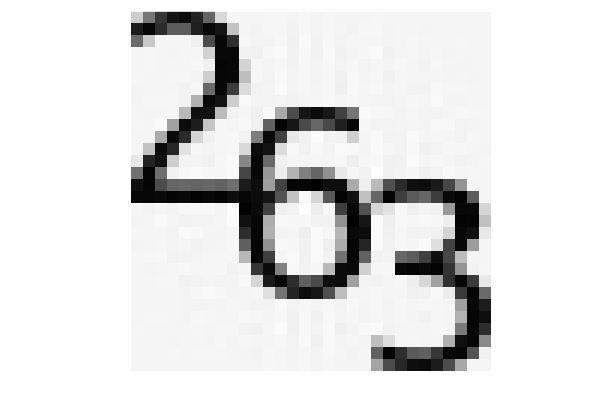

In [8]:
raw_L = data["line_pixel_lengths"]["data"]
println("size(raw_L) = ", size(raw_L))

L = reduce(hcat, raw_L)                     
println("size(L) = ", size(L))
L = Float64.(L)
y = Float64.(data["y"]["data"])
n = Int(data["npixels"]["data"])
N = Int(data["N"]["data"])

println("size(L) = ", size(L))
println("length(y) = ", length(y))
println("npixels = ", n)

x_hat = L \ y

p = heatmap(reshape(x_hat, n, n),
        yflip=true, aspect_ratio=:equal,
        color=:gist_gray, cbar=:none, framestyle=:none)
display(p)